# Submission Pertama: Menyelesaikan Permasalahan Human Resources PT Jaya Maju

- Nama: Achmad Supriyanto
- Id Dicoding: achmad.supriyanto@gmail.com

## Persiapan

### Menyiapkan library yang dibutuhkan

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



### Menyiapkan data yang akan digunakan

In [382]:
data_karyawan = pd.read_csv("employee_data.csv", encoding='windows-1252')

## Data Understanding

In [383]:
data_karyawan.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [384]:
data_karyawan.shape

(1470, 35)

In [385]:
data_karyawan.dtypes

EmployeeId                    int64
Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

## Data Preparation / Preprocessing

In [386]:
data_karyawan.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [387]:
data_karyawan.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [388]:
data_karyawan.duplicated().sum()

0

In [389]:
data_karyawan.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

#### Attrition di-isi dengan nilai dominan yaitu (0)

In [390]:
data_karyawan['Attrition'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18352\1113913951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_karyawan['Attrition'].fillna(0, inplace=True)


In [391]:
data_karyawan.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Feature Engineering

In [392]:
data_karyawan['PerformanceSatisfactionIndex'] = data_karyawan[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)

In [393]:
def satisfaction(score):
    score = float(score)
    if (score >= 1.00) and (score <= 1.99):
        return 'Low'
    elif (score >= 2.0) and (score <= 2.99):
        return 'Medium'
    elif (score >= 3.00) and (score <= 3.99):
        return 'High'
    else:
        return 'Very High'

data_karyawan['PerformanceSatisfactionIndex'] = data_karyawan['PerformanceSatisfactionIndex'].apply(satisfaction)

In [394]:
data_karyawan['ExperiencePriorToCurrentJob'] = data_karyawan['TotalWorkingYears'] - data_karyawan['YearsAtCompany']
data_karyawan.drop(['TotalWorkingYears', 'YearsAtCompany'],axis=1,inplace=True)

In [395]:
def experience(years):
    if (years >= 0) and (years <= 5):
        return 'Junior'
    elif (years >= 6) and (years <= 10):
        return 'Mid-level'
    elif (years >= 11) and (years <= 20):
        return 'Senior'
    elif (years >= 21) and (years <= 30):
        return 'Expert'
    else:
        return 'Veteran'

data_karyawan['ExperiencePriorToCurrentJob'] = data_karyawan['ExperiencePriorToCurrentJob'].apply(experience)

In [396]:
data_karyawan['EmployeeEngagementScore'] = (data_karyawan['JobInvolvement'] + data_karyawan['PerformanceRating'] + data_karyawan['WorkLifeBalance']) / 3
data_karyawan.drop(['JobInvolvement', 'PerformanceRating', 'WorkLifeBalance'],axis=1,inplace=True)

In [397]:
def engagement(score):
    score = float(score)
    if (score >= 1.00) and (score <= 1.99):
        return 'Bad'
    elif (score >= 2.0) and (score <= 2.99):
        return 'Good'
    elif (score >= 3.00) and (score <= 3.99):
        return 'Better'
    else:
        return 'Best'

data_karyawan['EmployeeEngagementScore'] = data_karyawan['EmployeeEngagementScore'].apply(engagement)

In [398]:
def distance_category(distance):
    if (distance >= 1) & (distance <= 10):
        return 'Short Distance'
    elif (distance >= 11) & (distance <= 20):
        return 'Medium Distance'
    else:
        return 'Long Distance'

data_karyawan['DistanceFromHomeCategory'] = data_karyawan['DistanceFromHome'].apply(distance_category)


In [399]:
def generation(age):
    if (age >= 61) & (age <= 70):
        return 'Baby Boomers'
    elif (age >= 51) & (age <= 60):
        return 'Gen X'
    elif (age >= 41) & (age <= 50):
        return 'Gen Y'
    elif (age >= 31 ) & (age <= 40):
        return 'Millennials'
    else:
        return 'Gen Z'

data_karyawan['AgeGeneration'] = data_karyawan['Age'].apply(generation)

In [400]:
def educationdegree(education):
    if (education == 1) :
        return 'High School'
    elif (education == 2):
        return 'Associate Degree'
    elif (education == 3):
        return 'Bachelor Degree'
    elif (education == 5):
        return 'Master Degree'
    else:
        return 'Doctoral Degree'

data_karyawan['EducationDegree'] = data_karyawan['Education'].apply(educationdegree)


In [401]:
data_karyawan.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceSatisfactionIndex,ExperiencePriorToCurrentJob,EmployeeEngagementScore,DistanceFromHomeCategory,AgeGeneration,EducationDegree
0,1,38,0.0,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,2,1,2,Medium,Junior,Better,Short Distance,Millennials,Doctoral Degree
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,2,0,0,0,Low,Senior,Bad,Medium Distance,Millennials,Associate Degree
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,2,0,2,7,Medium,Mid-level,Better,Short Distance,Gen X,Doctoral Degree
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,2,4,4,8,High,Junior,Better,Long Distance,Gen Y,Bachelor Degree
4,5,40,0.0,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,3,0,2,Medium,Senior,Better,Short Distance,Millennials,Doctoral Degree


In [402]:
data_karyawan.to_csv('employee_clean.csv', index=False)

In [403]:
job_level_mapping = {
    1: 'Staff',
    2: 'Junior Supervisor',
    3: 'Senior Supervisor',
    4: 'Junior Manager',
    5: 'Senior Manager'
}
data_karyawan['JobLevelMaping'] = data_karyawan['JobLevel'].map(job_level_mapping)

In [404]:
data_karyawan.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceSatisfactionIndex,ExperiencePriorToCurrentJob,EmployeeEngagementScore,DistanceFromHomeCategory,AgeGeneration,EducationDegree,JobLevelMaping
0,1,38,0.0,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,1,2,Medium,Junior,Better,Short Distance,Millennials,Doctoral Degree,Staff
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,0,0,0,Low,Senior,Bad,Medium Distance,Millennials,Associate Degree,Junior Supervisor
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,0,2,7,Medium,Mid-level,Better,Short Distance,Gen X,Doctoral Degree,Staff
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,4,8,High,Junior,Better,Long Distance,Gen Y,Bachelor Degree,Junior Manager
4,5,40,0.0,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,3,0,2,Medium,Senior,Better,Short Distance,Millennials,Doctoral Degree,Staff


### Exploratory Data Analysis
- Berapa banyak karyawan yang resign ?
- Faktor apa saja yang menyebabkan karyawan resign ?

In [405]:
data_karyawan['Attrition'] = data_karyawan['Attrition'].factorize(['No','Yes'])[0]
data_karyawan['Attrition'].value_counts()

Attrition
0    1291
1     179
Name: count, dtype: int64

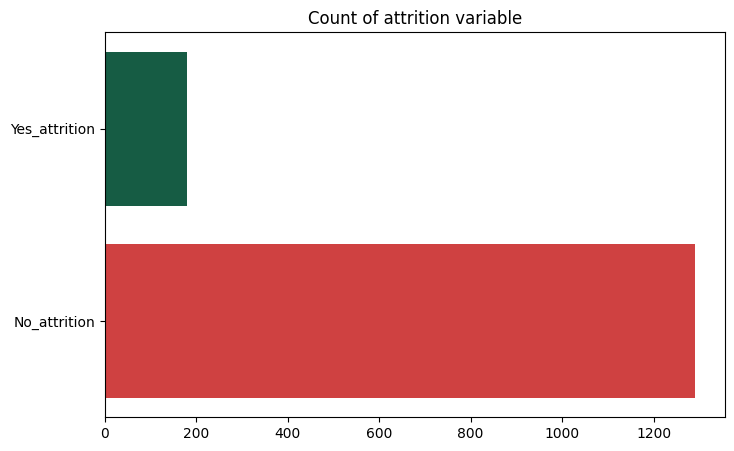

In [406]:
attrition = data_karyawan[data_karyawan['Attrition'] == 1]
no_attrition = data_karyawan[data_karyawan['Attrition'] == 0]

attrition_count = len(attrition)
no_attrition_count = len(no_attrition)

categories = ['Yes_attrition', 'No_attrition']
counts = [attrition_count, no_attrition_count]

plt.figure(figsize=(8, 5))
sns.barplot(x=counts, y=categories, hue=categories, palette=['#0A6847','#E72929'], dodge=False, legend=False)

plt.title('Count of attrition variable')
plt.show()

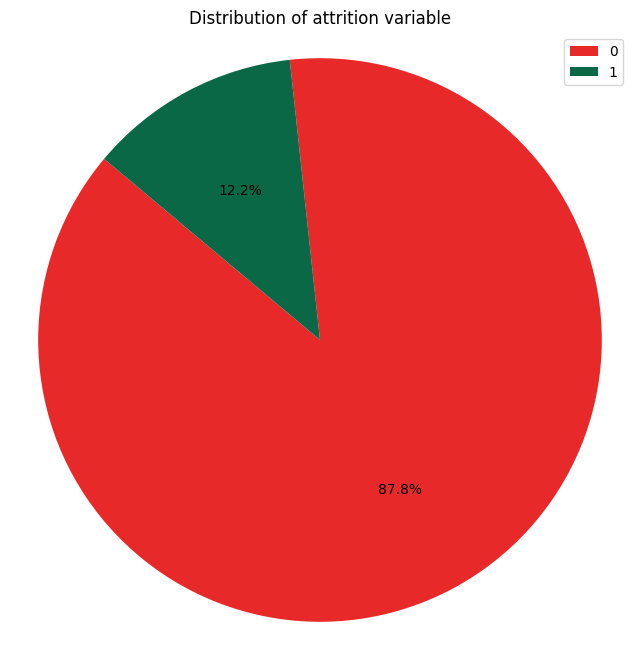

In [407]:
plt.figure(figsize=(8, 8))

attrition_counts = data_karyawan['Attrition'].value_counts()
labels = attrition_counts.index
sizes = attrition_counts.values
colors = ['#E72929', '#0A6847']

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140, labeldistance=0.7)
plt.axis('equal')
plt.legend(labels, loc="best")

plt.title('Distribution of attrition variable')
plt.show()

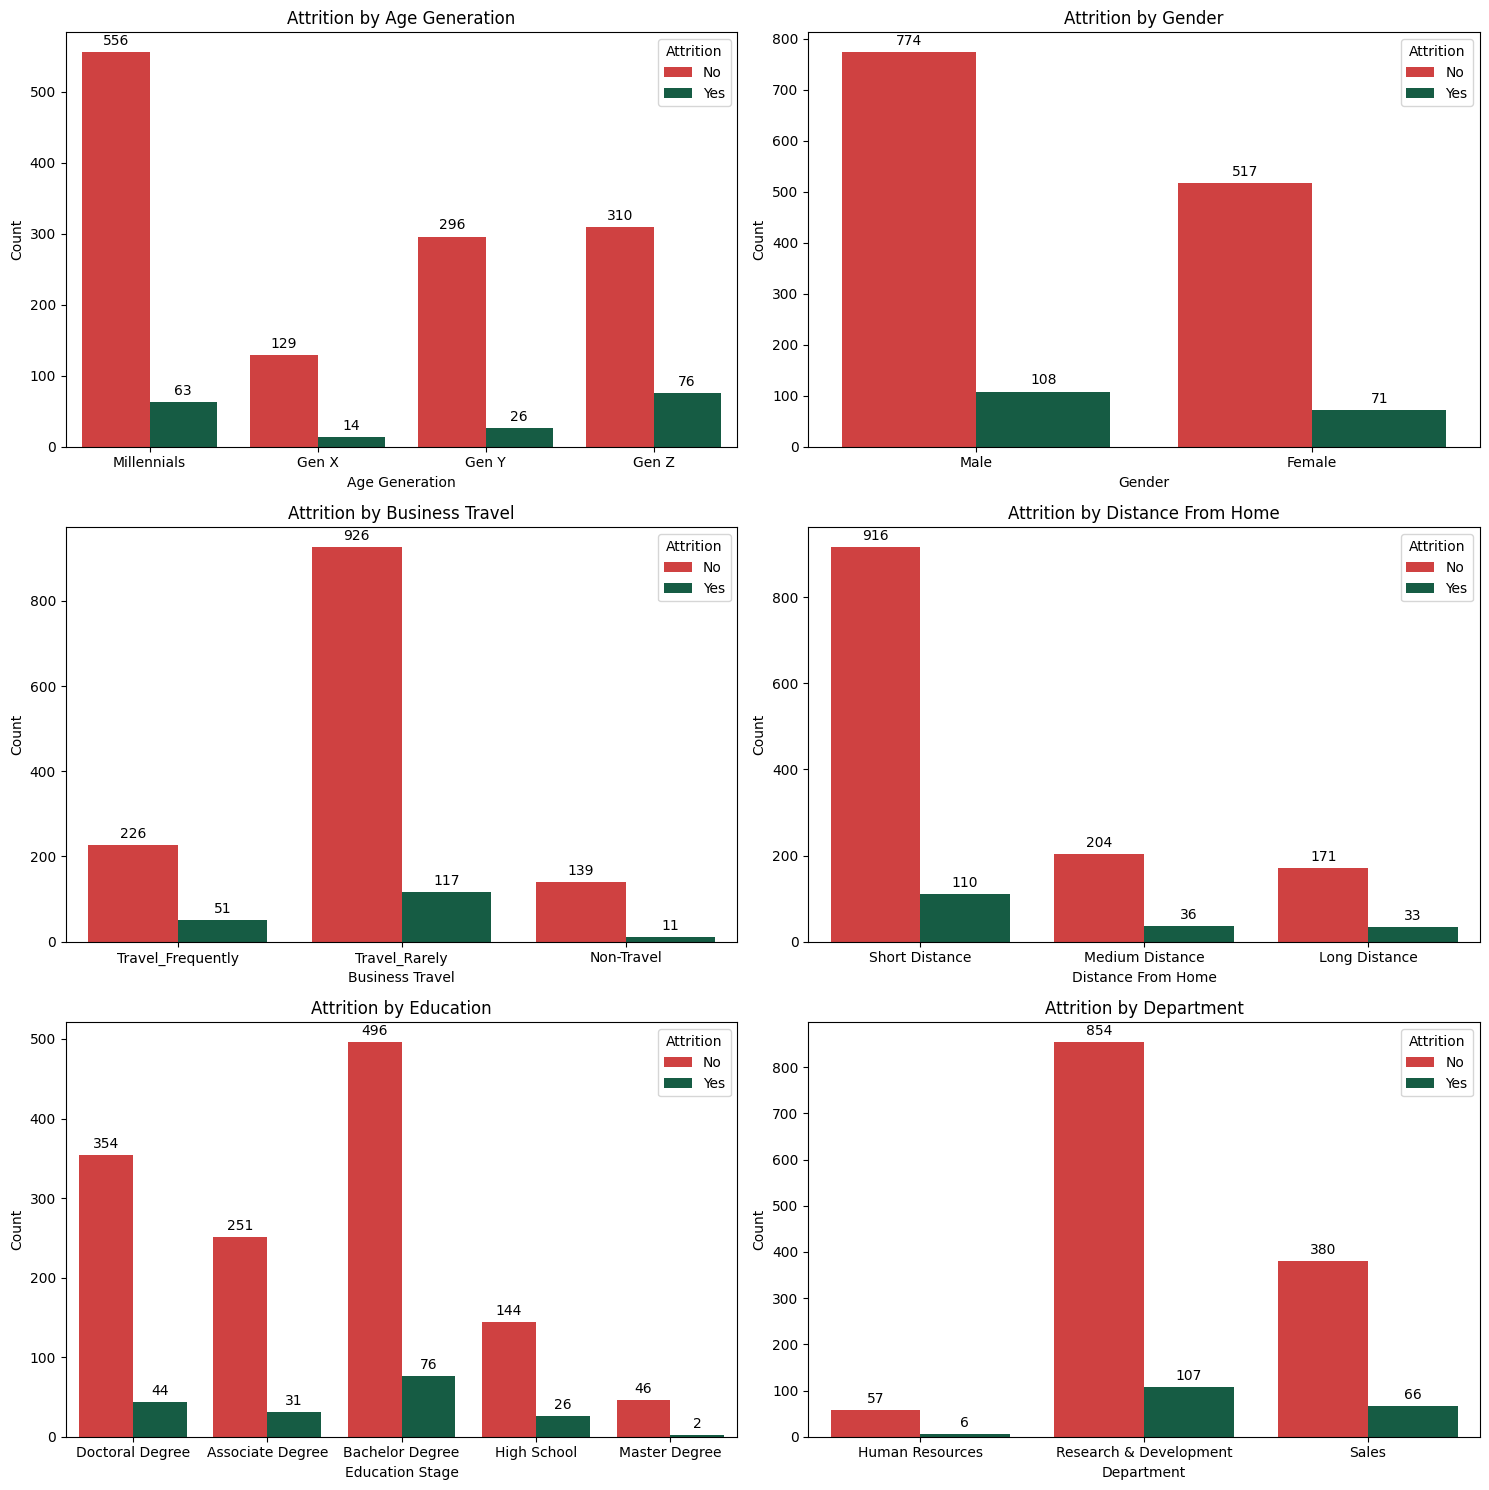

In [408]:
# Define color palette
colors = ['#E72929', '#0A6847']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot Attrition by Age Generation
sns.countplot(x='AgeGeneration', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Age Generation')
axes[0, 0].set_xlabel('Age Generation')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Business Travel
sns.countplot(x='BusinessTravel', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Business Travel')
axes[1, 0].set_xlabel('Business Travel')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Distance From Home
sns.countplot(x='DistanceFromHomeCategory', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Attrition by Distance From Home')
axes[1, 1].set_xlabel('Distance From Home')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Education
sns.countplot(x='EducationDegree', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Attrition by Education')
axes[2, 0].set_xlabel('Education Stage')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Attrition by Department')
axes[2, 1].set_xlabel('Department')
axes[2, 1].set_ylabel('Count')
axes[2, 1].legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

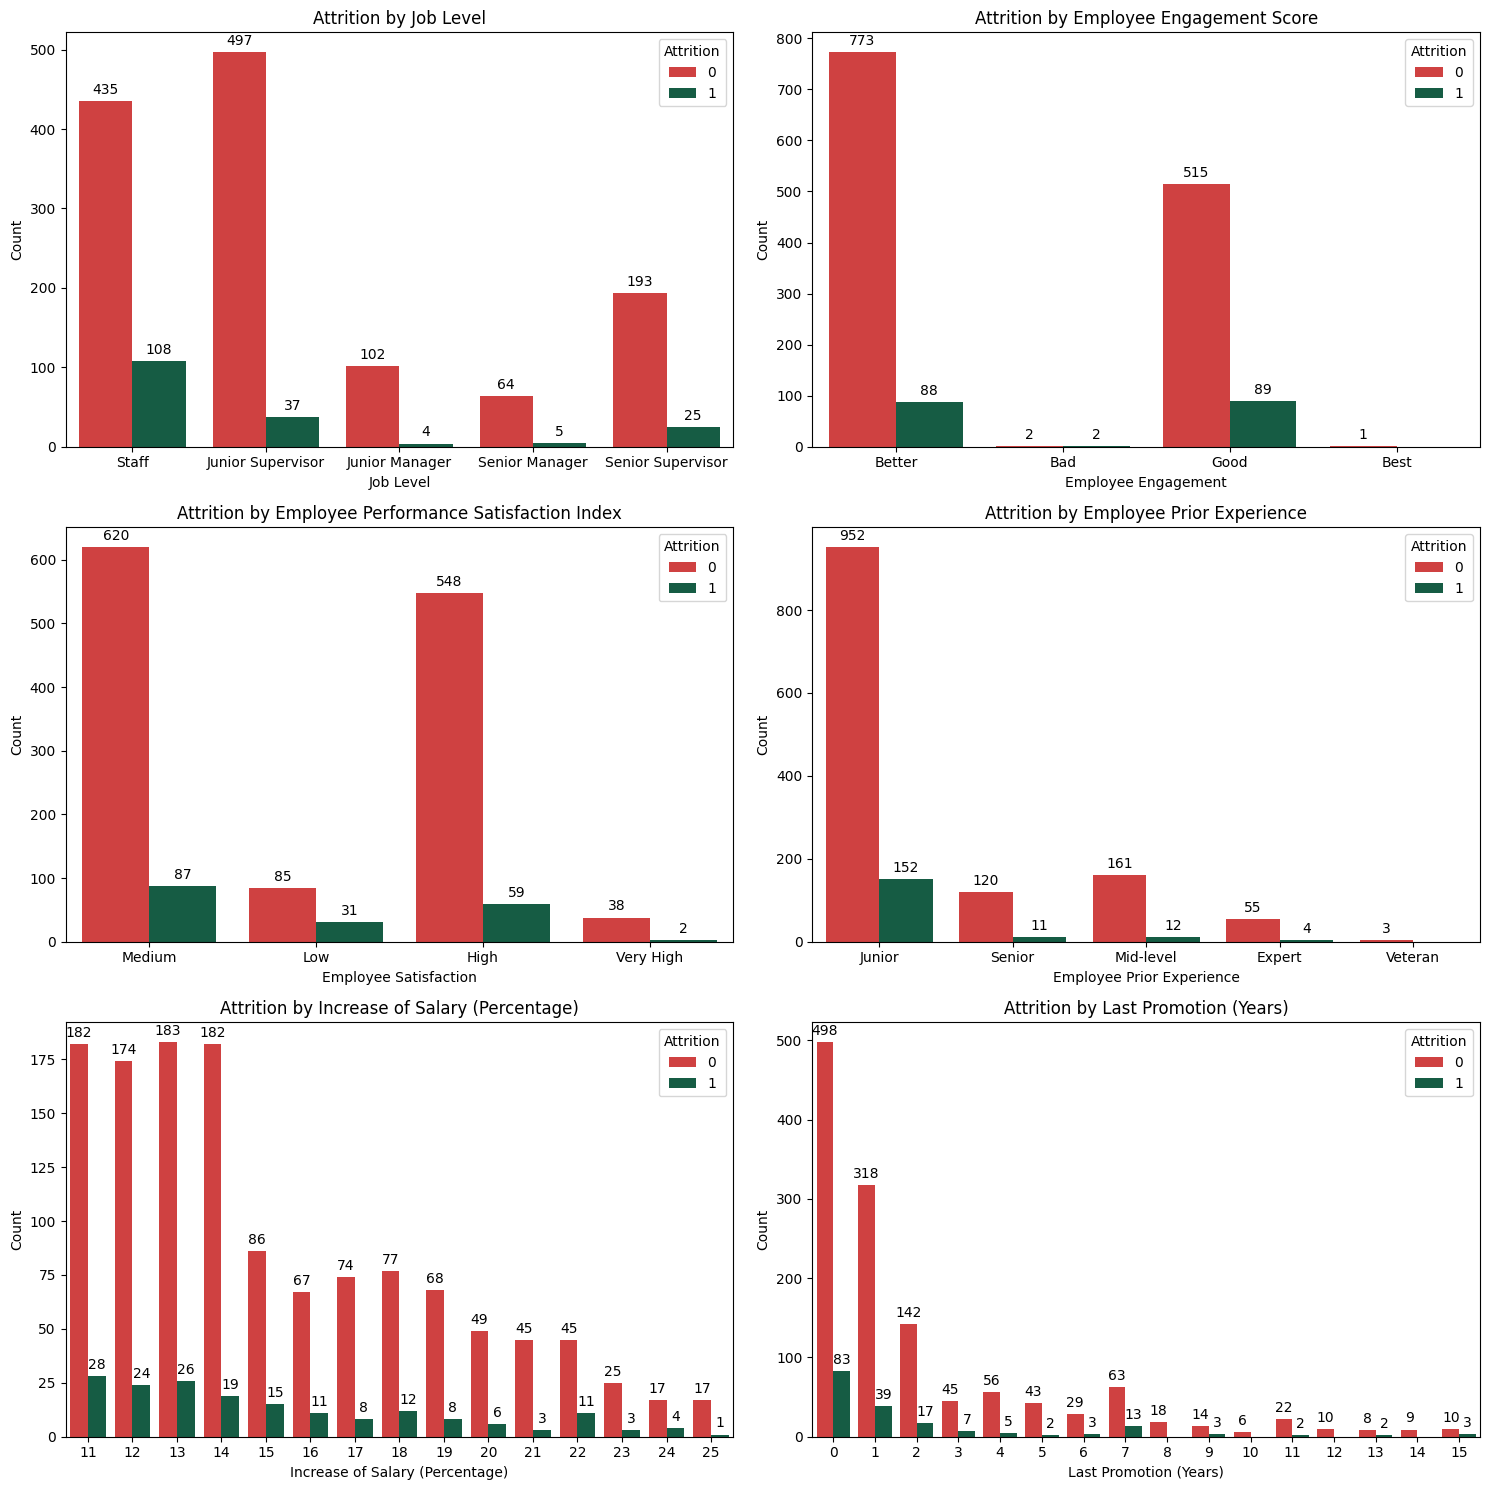

In [409]:
# Define color palette
colors = ['#E72929', '#0A6847']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Plot Attrition by Job Level
sns.countplot(x='JobLevelMaping', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Job Level')
axes[0, 0].set_xlabel('Job Level')
axes[0, 0].set_ylabel('Count')
for p in axes[0, 0].patches:
    if p.get_height() > 0:
        axes[0, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Employee Engagement Score
sns.countplot(x='EmployeeEngagementScore', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Employee Engagement Score')
axes[0, 1].set_xlabel('Employee Engagement')
axes[0, 1].set_ylabel('Count')
for p in axes[0, 1].patches:
    if p.get_height() > 0:
        axes[0, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Employee Performance Satisfaction Index
sns.countplot(x='PerformanceSatisfactionIndex', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Employee Performance Satisfaction Index')
axes[1, 0].set_xlabel('Employee Satisfaction')
axes[1, 0].set_ylabel('Count')
for p in axes[1, 0].patches:
    if p.get_height() > 0:
        axes[1, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Employee Prior Experience
sns.countplot(x='ExperiencePriorToCurrentJob', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Attrition by Employee Prior Experience')
axes[1, 1].set_xlabel('Employee Prior Experience')
axes[1, 1].set_ylabel('Count')
for p in axes[1, 1].patches:
    if p.get_height() > 0:
        axes[1, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Percent Salary Hike
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Attrition by Increase of Salary (Percentage)')
axes[2, 0].set_xlabel('Increase of Salary (Percentage)')
axes[2, 0].set_ylabel('Count')
for p in axes[2, 0].patches:
    if p.get_height() > 0:
        axes[2, 0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

# Plot Attrition by Years Since Last Promotion
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=data_karyawan, palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Attrition by Last Promotion (Years)')
axes[2, 1].set_xlabel('Last Promotion (Years)')
axes[2, 1].set_ylabel('Count')
for p in axes[2, 1].patches:
    if p.get_height() > 0:
        axes[2, 1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')


# Adjust layout
plt.tight_layout()
plt.show()

## Modeling

In [410]:
data_karyawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmployeeId                    1470 non-null   int64 
 1   Age                           1470 non-null   int64 
 2   Attrition                     1470 non-null   int64 
 3   BusinessTravel                1470 non-null   object
 4   DailyRate                     1470 non-null   int64 
 5   Department                    1470 non-null   object
 6   DistanceFromHome              1470 non-null   int64 
 7   Education                     1470 non-null   int64 
 8   EducationField                1470 non-null   object
 9   EmployeeCount                 1470 non-null   int64 
 10  EnvironmentSatisfaction       1470 non-null   int64 
 11  Gender                        1470 non-null   object
 12  HourlyRate                    1470 non-null   int64 
 13  JobLevel          

In [411]:
selected_features = ['Age', 'JobLevel', 'Education']

X = data_karyawan[selected_features]
y = data_karyawan['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

In [412]:
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')

Logistic Regression Accuracy: 0.891156462585034
Random Forest Accuracy: 0.8639455782312925


## Deployment

In [413]:
# Save the model with joblib
from joblib import dump
dump(logreg_model, 'logistic_regression_model.joblib')
print('Model saved as logistic_regression_model.joblib')


Model saved as logistic_regression_model.joblib
